<a href="https://colab.research.google.com/github/aashwinmishra/YOLOExperiments/blob/main/YOLOv5_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.1/749.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16525, done.
remote: Total 16525 (delta 0), reused 0 (delta 0), pack-reused 16525
Receiving objects: 100% (16525/16525), 15.06 MiB | 21.04 MiB/s, done.
Resolving deltas: 100% (11359/11359), done.


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import uuid
import os
import time

In [13]:
%matplotlib inline

In [4]:
Image_path = os.path.join('data', 'images')
labels = ['automobile', 'person']
num_images = 9

In [24]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
imgs = ['https://ultralytics.com/images/zidane.jpg']

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-4 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
results = model(imgs)
results.print()
results.xyxy[0]
results.pandas().xyxy[0]

image 1/1: 720x1280 2 persons, 2 ties
Speed: 982.8ms pre-process, 351.0ms inference, 34.5ms NMS per image at shape (1, 3, 384, 640)


,xmin,ymin,xmax,ymax,confidence,class,name
0,743.290527,48.343567,1141.756470,720.000000,0.879861,0,person
1,441.989624,437.336731,496.585083,710.036194,0.675118,27,tie
2,123.051178,193.238068,714.690796,719.771240,0.666693,0,person
3,978.989807,313.579529,1025.302856,415.526184,0.261518,27,tie


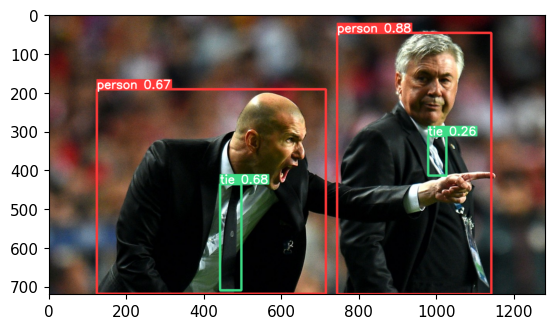

In [10]:
plt.imshow(np.squeeze(results.render()))
plt.show()

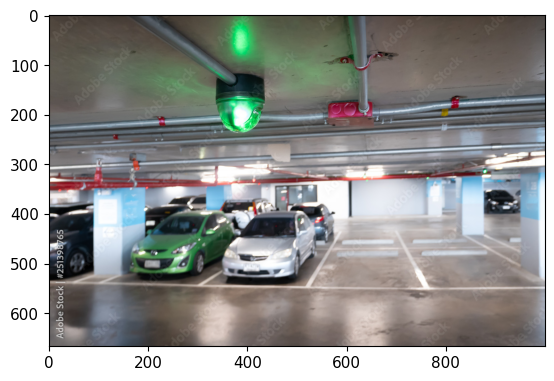

In [12]:
image1 = plt.imread('images/parking_lot1.jpeg')
plt.imshow(image1)

image 1/1: 667x1000 6 cars, 2 traffic lights
Speed: 11.0ms pre-process, 464.0ms inference, 5.0ms NMS per image at shape (1, 3, 448, 640)


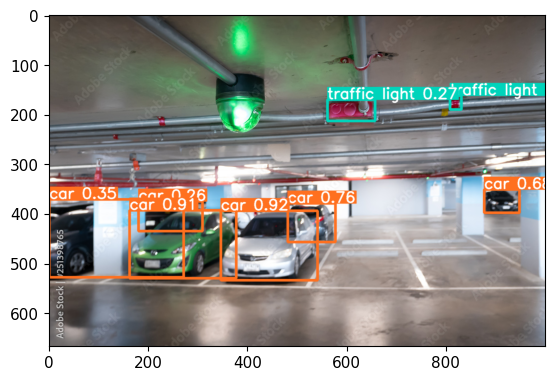

In [14]:
results = model(image1)
results.print()
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
def compare_detections(image: np.array, model: torch.nn.Module):
  results = model(image)
  results.print()

  fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 8))
  ax0.imshow(image)
  ax1.imshow(np.squeeze(results.render()))
  plt.show()

image 1/1: 667x1000 6 cars, 2 traffic lights
Speed: 36.6ms pre-process, 1102.6ms inference, 17.2ms NMS per image at shape (1, 3, 448, 640)


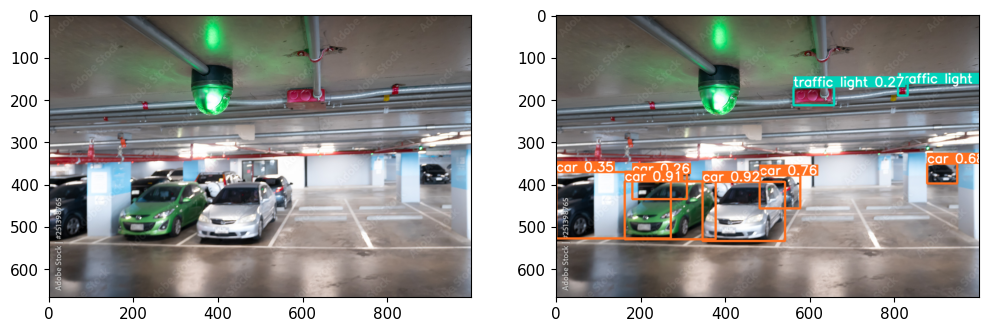

In [18]:
compare_detections(image1, model)

image 1/1: 893x846 1 person, 6 cars, 1 traffic light, 1 handbag
Speed: 12.0ms pre-process, 481.1ms inference, 4.4ms NMS per image at shape (1, 3, 640, 608)


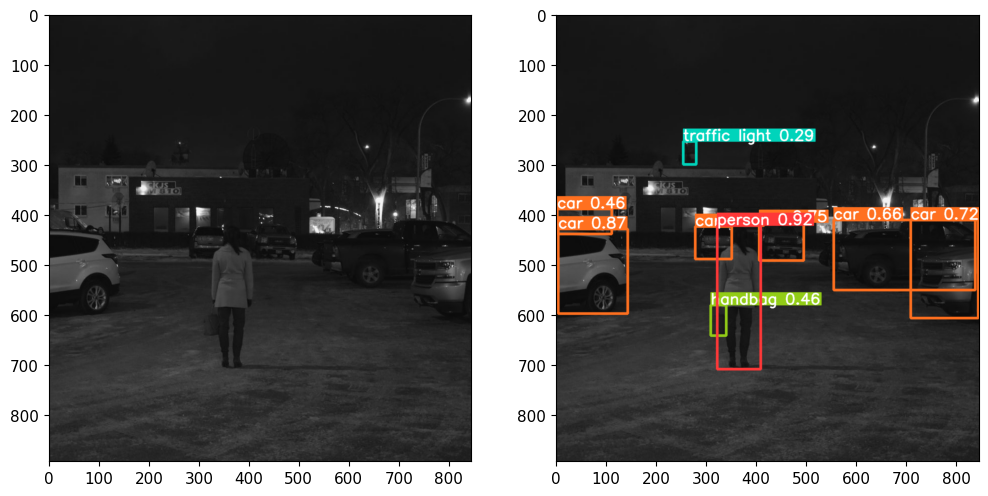

In [21]:
image2 = plt.imread('images/parking_lot2.jpeg')
compare_detections(image2, model)

In [15]:
!cd yolov5 && python train.py --img 320 --batch 8 --epochs 100 --data dataset.yaml --weights yolov5s.pt

2024-04-04 02:29:03.846202: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 02:29:03.846270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 02:29:03.848714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, op

In [16]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-4-4 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


image 1/1: 183x275 1 person, 1 bicycle, 6 cars, 2 handbags
Speed: 4.4ms pre-process, 432.6ms inference, 1.7ms NMS per image at shape (1, 3, 448, 640)


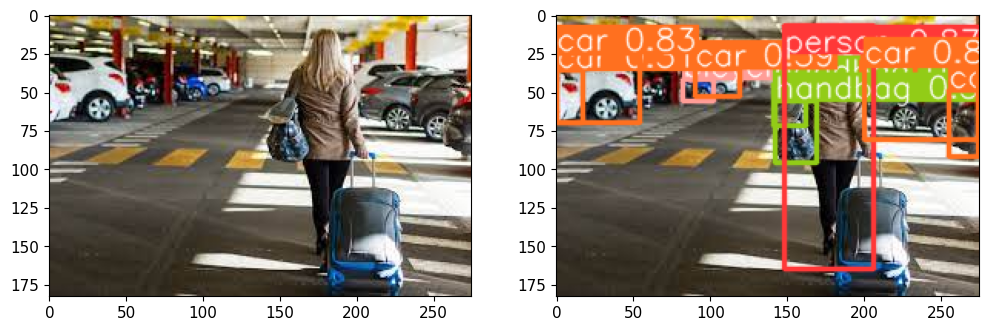

In [30]:
image = plt.imread('./data/images/parking_lot7.jpeg')
compare_detections(image, model)